In [6]:
import pandas as pd
from transformers import pipeline
import tqdm
tqdm.tqdm.pandas()

In [7]:
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("T'estimo!")

[{'label': 'Positive', 'score': 0.6600587964057922}]

In [8]:
tweets = pd.read_json("tweets_flat.json", lines=True)
tweets.head()

,text,public_metrics,entities,reply_settings,created_at,id,source,author_id,possibly_sensitive,lang,conversation_id,author,__twarc,in_reply_to_user_id,referenced_tweets,in_reply_to_user,context_annotations,attachments,geo
0,5: @HullHospitals @NHSEngland from needing a b...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'annotations': [{'start': 109, 'end': 112, 'p...",everyone,2022-07-24 08:20:40+00:00,1551120166779592704,Twitter for iPhone,85909290,False,en,1551120166779592704,{'description': 'Mother of two. Living back in...,{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN,NaN,NaN,NaN
1,@healthyopinion @NHSEngland From the Empire? M...,"{'retweet_count': 0, 'reply_count': 1, 'like_c...","{'annotations': [{'start': 48, 'end': 50, 'pro...",everyone,2022-07-19 20:40:20+00:00,1549494367626428416,Twitter for iPad,21388147,False,en,1549468647504093184,{'description': 'Retired dentist writes a lot ...,{'url': 'https://api.twitter.com/2/tweets/sear...,362852730.0,"[{'type': 'replied_to', 'id': '154949320030545...","{'entities': {'url': {'urls': [{'start': 0, 'e...",NaN,NaN,NaN
2,"@NHSEngland \nFrom enjoying our parks, outdoor...","{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 248, 'end': 271, 'url': 'h...",everyone,2022-07-17 13:15:35+00:00,1548657667777896448,Twitter Web App,937672447083663360,False,en,1548657667777896448,"{'description': '', 'profile_image_url': 'http...",{'url': 'https://api.twitter.com/2/tweets/sear...,551426814.0,NaN,"{'entities': {'url': {'urls': [{'start': 0, 'e...","[{'domain': {'id': '65', 'name': 'Interests an...",NaN,NaN
3,RT @NHSEngland: From caring for patients in ho...,"{'retweet_count': 11, 'reply_count': 0, 'like_...","{'annotations': [{'start': 78, 'end': 80, 'pro...",everyone,2022-07-14 13:40:51+00:00,1547576864566194176,Twitter for Android,1542568393915699200,False,en,1547576864566194176,"{'description': '', 'profile_image_url': 'http...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,"[{'type': 'retweeted', 'id': '1532345051237449...",NaN,NaN,NaN,NaN
4,Watching a documentary about #racism in the @...,"{'retweet_count': 0, 'reply_count': 0, 'like_c...","{'urls': [{'start': 158, 'end': 181, 'url': 'h...",everyone,2022-07-14 10:39:31+00:00,1547531228739403776,Twitter Web App,847173200261890048,False,en,1547531228739403776,"{'entities': {'url': {'urls': [{'start': 0, 'e...",{'url': 'https://api.twitter.com/2/tweets/sear...,NaN,NaN,NaN,"[{'domain': {'id': '87', 'name': 'Movie Genre'...",NaN,NaN


In [9]:
def get_sentiment(x):
    return sentiment_task(x)[0]['label']

tweets["sentiment"] = tweets["text"].progress_map(get_sentiment)

100%|███████████████████████████████████████████████████████████████████████████████| 3482/3482 [16:09<00:00,  3.59it/s]


In [13]:
tweets = tweets.set_index("id")
tweets["sentiment"].to_csv("tweet_sentiment.csv")

KeyError: "None of ['id'] are in the columns"

In [14]:
tweets["sentiment"].value_counts()

Neutral     2517
Positive     824
Negative     141
Name: sentiment, dtype: int64

In [36]:
# def split_label(x):
#     print(x)
#     if x <= "2020-01-01 00:00:00+00:00":
#         return "before"
#     elif x > "2020-01-01 00:00:00+00:00" and x < "2020-01-01 00:00:00+00:00":
#         return "first_wave"
#     elif x >= "2020-09-01 00:00:00+00:00":
#         return "after_first"

tweets["split"] = "after_first"
tweets.loc[(tweets["created_at"] < "2020-09-01 00:00:00+00:00"), "split"] = "first_wave"
tweets.loc[(tweets["created_at"] < "2020-01-01 00:00:00+00:00"), "split"] = "before"
# tweets["split"] = "N/A"
# tweets["split"] = tweets["created_at"] <= "2020-01-01 00:00:00+00:00"
# tweets["split"] = tweets["created_at"].map(split_label)
tweets["split"].value_counts()

after_first    1544
first_wave     1460
before          478
Name: split, dtype: int64

<AxesSubplot:xlabel='split', ylabel='count'>

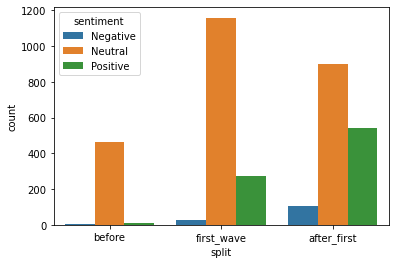

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=tweets, x="split", hue="sentiment", order=["before", "first_wave", "after_first"])

In [54]:
tweets.groupby("split")["sentiment"].value_counts(normalize=True)

split        sentiment
after_first  Neutral      0.580959
             Positive     0.351684
             Negative     0.067358
before       Neutral      0.966527
             Positive     0.018828
             Negative     0.014644
first_wave   Neutral      0.793151
             Positive     0.186301
             Negative     0.020548
Name: sentiment, dtype: float64

In [63]:
reshaped = tweets.groupby("split")["sentiment"].value_counts(normalize=True).rename("percent").reset_index()
reshaped

,split,sentiment,percent
0,after_first,Neutral,0.580959
1,after_first,Positive,0.351684
2,after_first,Negative,0.067358
3,before,Neutral,0.966527
4,before,Positive,0.018828
5,before,Negative,0.014644
6,first_wave,Neutral,0.793151
7,first_wave,Positive,0.186301
8,first_wave,Negative,0.020548


<AxesSubplot:xlabel='split', ylabel='percent'>

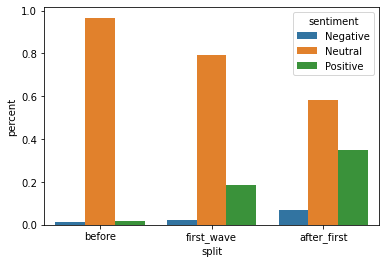

In [81]:
sns.barplot(data=reshaped, x="split", y="percent", hue="sentiment", 
            order=["before", "first_wave", "after_first"], 
            hue_order=["Negative", "Neutral", "Positive"])

<AxesSubplot:xlabel='split', ylabel='percent'>

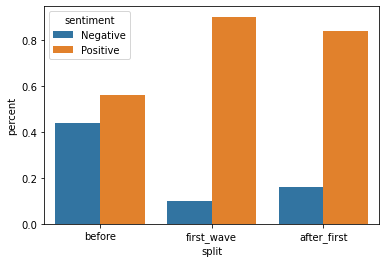

In [86]:
no_neutral = tweets[tweets["sentiment"] != "Neutral"]
reshaped_no_neutral = no_neutral.groupby("split")["sentiment"].value_counts(normalize=True).rename("percent").reset_index()
sns.barplot(data=reshaped_no_neutral, x="split", y="percent", hue="sentiment", 
            order=["before", "first_wave", "after_first"], 
            hue_order=["Negative", "Positive"])